# Lab 9: Neural Networks for text

In [1]:
# Global imports and settings
%matplotlib inline
import numpy as np
import pandas as pd
import openml as oml
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
print("Using Keras",keras.__version__)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

Using Keras 2.2.4-tf


Before you start, read the Tutorial for this lab ('Deep Learning with Python')

## Exercise 1: Sentiment Analysis
* Take the IMDB dataset from keras.datasets with 10000 words and the default train-test-split

In [2]:
from tensorflow.keras.datasets import imdb
# Download IMDB data with 10000 most frequent words
word_index = imdb.get_word_index()
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

for i in [0,5,10]:
    print("Review {}:".format(i),' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]][0:20]))

Review 0: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you
Review 5: ? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes
Review 10: ? french horror cinema has seen something of a revival over the last couple of years with great films such


* Vectorize the reviews using one-hot-encoding (see tutorial for helper code) 

In [3]:
# Custom implementation of one-hot-encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print("Encoded review: ", train_data[0][0:10])
print("One-hot-encoded review: ", x_train[0][0:10])

# Convert 0/1 labels to float
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print("Label: ", y_train[0])

Encoded review:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
One-hot-encoded review:  [0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
Label:  1.0


* Build a network of 2 _Dense_ layers with 16 nodes each and the _ReLU_ activation function.
* Use cross-entropy as the loss function, Adagrad as the optimizer, and accuracy as the evaluation matric.

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* Plot the learning curves, using the first 10000 samples as the validation set and the rest as the training set.
* Use 20 epochs and a batch size of 512

In [5]:
x_val, partial_x_train = x_train[:10000], x_train[10000:]
y_val, partial_y_train = y_train[:10000], y_train[10000:] 
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val))

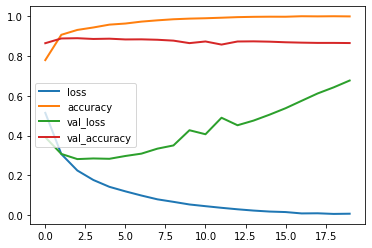

In [6]:
# Plotting
pd.DataFrame(history.history).plot(lw=2);

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* Retrain the model, this time using early stopping to stop training at the optimal time

In [8]:
# Based on the figure, we should stop after 4 epochs
model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=0)
result = model.evaluate(x_test, y_test)
print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))

25000/25000 [==============================] - 2s 100us/sample - loss: 0.2879 - accuracy: 0.8862
Loss: 0.2879, Accuracy:  0.8862


* Try to manually improve the score and explain what you observe. E.g. you could:
    - Try 3 hidden layers
    - Change to a higher learning rate (e.g. 0.4)
    - Try another optimizer (e.g. Adagrad)
    - Use more or fewer hidden units (e.g. 64)
    - `tanh` activation instead of `ReLU`

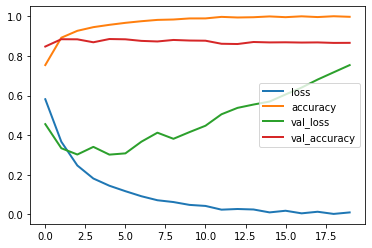

In [9]:
# Three hidden layers
# Not really worth it, very similar results
# Overfits even faster
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val))
pd.DataFrame(history.history).plot(lw=2);

In [10]:
# Set the learning rate to 0.1 and plot the learning curves again.
# learning rate 0.4 gives very high losses which don't plot nicely
# For high learning rates there is no  convergence, the loss actually increases
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=10, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val))

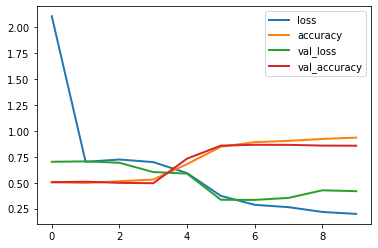

In [11]:
pd.DataFrame(history.history).plot(lw=2);

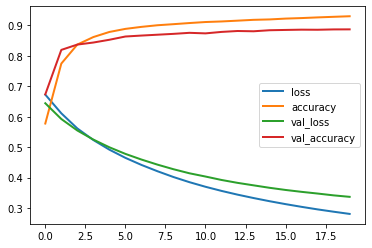

In [12]:
# Adagrad optimizer
# Seems more well-behaved but slower. The validation loss is still decreasing after 20 epochs.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val))
pd.DataFrame(history.history).plot(lw=2);

In [13]:
# Score is not better than RMSprop with early stopping, but could still improve with more epochs
result = model.evaluate(x_test, y_test)
print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))

25000/25000 [==============================] - 3s 114us/sample - loss: 0.3511 - accuracy: 0.8770
Loss: 0.3511, Accuracy:  0.8770


* Further tune the results by doing a grid search for the most interesting hyperparameters
    * Tune the learning rate between 0.001 and 1
    * Tune the number of epochs between 1 and 20
    * Use only 3-4 values for each

In [14]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(learning_rate=0.01):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizers.Adagrad(lr=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)
param_grid = {'epochs': [1, 10, 20],  # epochs is a fit parameter
              'learning_rate': [0.001, 0.01, 1], # this is a make_model parameter
              'verbose' : [0]}
grid = GridSearchCV(clf, param_grid=param_grid, cv=3, return_train_score=True)
grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x134b7e0f0>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [1, 10, 20],
                         'learning_rate': [0.001, 0.01, 1], 'verbose': [0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Grid search results

In [15]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_learning_rate"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_learning_rate                                   
1            1.00e-03                        0.64              0.65
             1.00e-02                        0.86              0.88
             1.00e+00                        0.50              0.50
10           1.00e-03                        0.86              0.88
             1.00e-02                        0.88              0.98
             1.00e+00                        0.50              0.50
20           1.00e-03                        0.87              0.90
             1.00e-02                        0.87              1.00
             1.00e+00                        0.50              0.50

## Exercise 2: Topic classification
* Take the Reuters dataset from keras.datasets with 10000 words and the default train-test-split

In [16]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

for i in [0,5,10]:
    print("News wire {}:".format(i),
          ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]]))
    # Note that our indices were offset by 3

Using TensorFlow backend.


News wire 0: ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
News wire 5: ? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3
News wire 10: ? period

* We have to vectorize the data and the labels using one-hot-encoding

In [17]:
from keras.utils.np_utils import to_categorical
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

* Build a network with 2 dense layers of 64 nodes each
* Make sensible choices about the activation functions, loss, ...

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

* Take a validation set from the first 1000 points of the training set
* Fit the model with 20 epochs and a batch size of 512
* Plot the learning curves

In [19]:
x_val, partial_x_train = x_train[:1000], x_train[1000:]
y_val, partial_y_train = one_hot_train_labels[:1000], one_hot_train_labels[1000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20, verbose=0,
                    batch_size=512,
                    validation_data=(x_val, y_val))

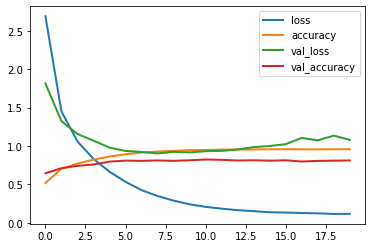

In [21]:
pd.DataFrame(history.history).plot(lw=2);

* Create an information bottleneck: rebuild the model, but now use only 4 hidden units in the second layer. Evaluate the model. Does it still perform well?

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128, verbose=0,
          validation_data=(x_val, y_val))
result = model.evaluate(x_test, one_hot_test_labels)
print("Loss: {:.4f}, Accuracy: {:.4f}".format(*result))

2246/2246 [==============================] - 0s 88us/sample - loss: 2.0950 - accuracy: 0.6901
Loss: 2.0950, Accuracy: 0.6901


## Exercise 3: Regularization
* Go back to the IMDB dataset
* Retrain with only 4 units per layer
* Plot the results. What do you observe?

In [23]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512, verbose=0,
                                   validation_data=(x_test, y_test))
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512, verbose=0,
                                       validation_data=(x_test, y_test))

The smaller model starts overfitting later than the original one, and it overfits more _slowly_

In [25]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

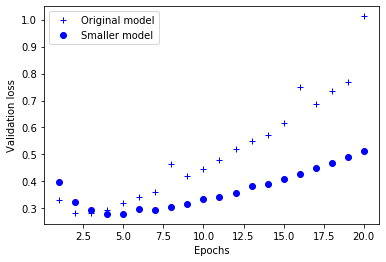

In [26]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

* Use 16 hidden nodes in the layers again, but now add weight regularization. Use L2 loss with alpha=0.001. What do you observe?

In [27]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [29]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512, verbose=0,
                             validation_data=(x_test, y_test))

L2 regularized model is much more resistant to overfitting, even though both have the same number of parameters

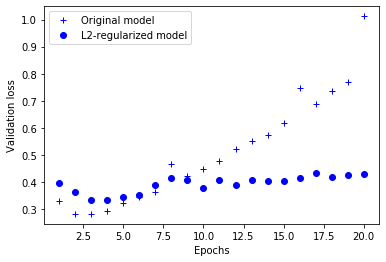

In [30]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

* Add a drop out layer after every dense layer. Use a dropout rate of 0.5. What do you observe?

``` python
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
```

In [31]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [32]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512, verbose=0,
                               validation_data=(x_test, y_test))

Dropout finds a better model, and overfits more slowly as well

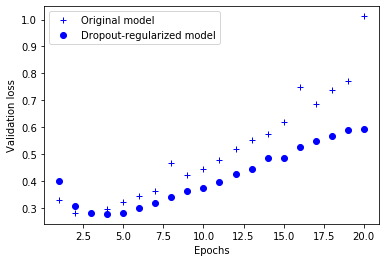

In [33]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## Exercise 4: Word embeddings

* Instead of one-hot-encoding, use a word embedding of length 300
* Only add an output layer after the embedding.
* Evaluate as before. Does it perform better?

In [34]:
from tensorflow.keras.layers import Embedding, Flatten, Dense

max_length = 20 # pad documents to a maximum number of words
vocab_size = 10000 # vocabulary size
embedding_length = 300 # vocabulary size
# define the model
model = models.Sequential()
model.add(Embedding(vocab_size, embedding_length, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the mode
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 300)           3000000   
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 6001      
Total params: 3,006,001
Trainable params: 3,006,001
Non-trainable params: 0
_________________________________________________________________
None
